In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_dict = pd.read_excel('factor_pricing_data.xlsx', sheet_name=None)
factor_returns = df_dict['factors (excess returns)']
p_returns = df_dict['portfolios (excess returns)']
fr = df_dict['risk-free rate']


In [4]:
# Indexing by date
factor_returns.set_index(factor_returns.columns[0], inplace=True)

**Question 2**

In [5]:
# Question 1: Calculating the mean, volatility, and sharpe ratio for each factor
print("Factor Return Means:")
print(factor_returns.mean() * 12)
print("Volatility:")
print(factor_returns.std() * np.sqrt(12))
print("Sharpe Ratio:")
print(factor_returns.mean() / factor_returns.std())
print("VaR (.05):")
print(factor_returns.quantile(0.05) * np.sqrt(12))




Factor Return Means:
MKT    0.084944
SMB    0.005420
HML    0.026508
RMW    0.045139
CMA    0.027686
UMD    0.061769
dtype: float64
Volatility:
MKT    0.156374
SMB    0.101365
HML    0.108907
RMW    0.083055
CMA    0.072496
UMD    0.153524
dtype: float64
Sharpe Ratio:
MKT    0.156811
SMB    0.015435
HML    0.070264
RMW    0.156890
CMA    0.110245
UMD    0.116146
dtype: float64
VaR (.05):
MKT   -0.251043
SMB   -0.149493
HML   -0.146220
RMW   -0.098675
CMA   -0.096493
UMD   -0.235680
Name: 0.05, dtype: float64


Each factor does have a premium.

Correlation Matrix:


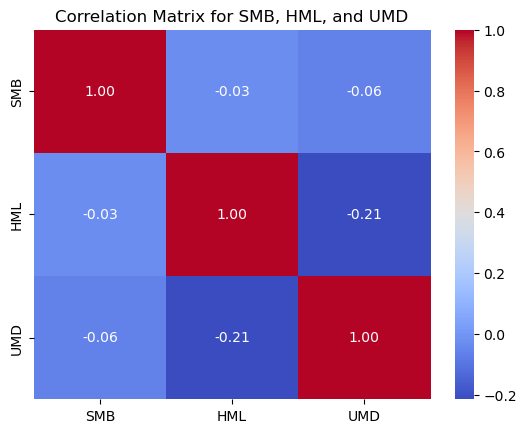

In [6]:
# Calculate the correlation matrix for 'SMB', 'HML', and 'UMD'
correlation_matrix = factor_returns[['SMB', 'HML', 'UMD']].corr()

# Display the correlation matrix using seaborn
print("Correlation Matrix:")
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for SMB, HML, and UMD")
plt.show()


SMB is largely uncorrelated with the other 2 factors, however HML & UMD are correlated with beta = -.21. Not high, but not negligible either.

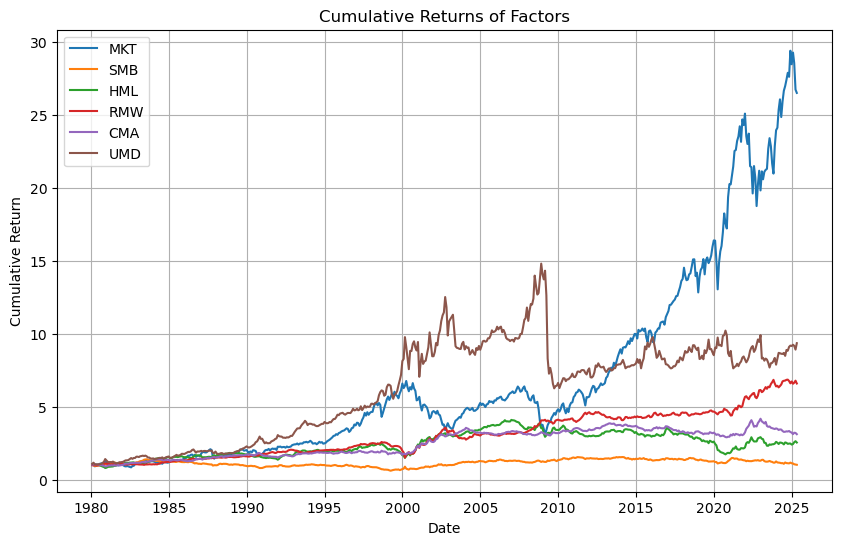

In [7]:
# Calculate cumulative returns for each factor
cumulative_returns = (1 + factor_returns).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

plt.title('Cumulative Returns of Factors')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Ensure p_returns is indexed by date
p_returns.set_index('Date', inplace=True)


In [31]:
mean_returns = p_returns.mean() * 12

volatility = p_returns.std() * np.sqrt(12)

sharpe_ratio = mean_returns / volatility

var_95 = p_returns.quantile(0.05) * np.sqrt(12)

print("Mean Returns:\n", mean_returns)
print("\nVolatility:\n", volatility)
print("\nSharpe Ratio:\n", sharpe_ratio)
print("\nValue at Risk (5%):\n", var_95)


Mean Returns:
 Agric    0.090492
Food     0.091434
Soda     0.107166
Beer     0.106462
Smoke    0.139915
Toys     0.058412
Fun      0.123368
Books    0.068678
Hshld    0.077151
Clths    0.087042
Hlth     0.078143
MedEq    0.097948
Drugs    0.099479
Chems    0.078141
Rubbr    0.090860
Txtls    0.075426
BldMt    0.099900
Cnstr    0.094178
Steel    0.063640
FabPr    0.053581
Mach     0.088416
ElcEq    0.099984
Autos    0.105644
Aero     0.104949
Ships    0.091970
Guns     0.111379
Gold     0.058057
Mines    0.082921
Coal     0.067868
Oil      0.082224
Util     0.076211
Telcm    0.072728
PerSv    0.069867
BusSv    0.085094
Hardw    0.087187
Softw    0.135931
Chips    0.121165
LabEq    0.091354
Paper    0.065914
Boxes    0.088899
Trans    0.086045
Whlsl    0.085672
Rtail    0.113451
Meals    0.099935
Banks    0.092012
Insur    0.094765
RlEst    0.052189
Fin      0.113378
Other    0.057015
dtype: float64

Volatility:
 Agric    0.216219
Food     0.149871
Soda     0.218976
Beer     0.170226
Sm

In [32]:
# Prepare the data for regression
X = volatility.values.reshape(-1, 1)
y = mean_returns.values

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.315
Date:                Sun, 06 Jul 2025   Prob (F-statistic):              0.257
Time:                        11:41:25   Log-Likelihood:                 122.89
No. Observations:                  49   AIC:                            -241.8
Df Residuals:                      47   BIC:                            -238.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1037      0.013      7.927      0.0

In [11]:
# Prepare the data for regression between mean returns and var_95
X_var = var_95.values.reshape(-1, 1)
y_mean = mean_returns.values

# Add a constant to the independent variable
X_var = sm.add_constant(X_var)

# Fit the regression model
model_var = sm.OLS(y_mean, X_var).fit()

# Print the summary of the regression
print(model_var.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.111
Date:                Sat, 05 Jul 2025   Prob (F-statistic):             0.0843
Time:                        12:20:30   Log-Likelihood:                 123.79
No. Observations:                  49   AIC:                            -243.6
Df Residuals:                      47   BIC:                            -239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1115      0.013      8.547      0.0

Neither the volatility nor the VaR(.05) statistics explain more than 5% in the variation in the excess returns of these portfolios.

**Question 3**

3.1 & 3.2

In [25]:
capm_regr = pd.DataFrame(columns=['Alpha', 'Beta', 'Treynor Ratio', 'Information Ratio'])

# Iterate over each portfolio in p_returns
for portfolio in p_returns.columns:
    X = sm.add_constant(factor_returns['MKT'])
    y = p_returns[portfolio]
    
    # Fit the regression model
    reg = sm.OLS(y, X).fit()
    
    # Extract regression parameters
    alpha = reg.params['const']
    beta = reg.params['MKT']
    treynor_ratio = (y.mean() - fr['RF'].mean()) / beta
    tracking_error = y - (alpha + beta * factor_returns['MKT'])
    information_ratio = tracking_error.mean() / tracking_error.std()
    
    # Store the results in the DataFrame
    capm_regr.loc[portfolio] = [alpha, beta, treynor_ratio, information_ratio]

print(capm_regr)


          Alpha      Beta  Treynor Ratio  Information Ratio
Agric  0.001906  0.796025       0.005334       5.698356e-17
Food   0.003547  0.575366       0.007516       4.718670e-17
Soda   0.003998  0.696773       0.008088       4.187256e-17
Beer   0.004446  0.625208       0.008920       9.132007e-17
Smoke  0.007331  0.611540       0.013678       2.625221e-17
Toys  -0.002996  1.110894       0.001416       5.646131e-17
Fun    0.001061  1.302473       0.005364       2.592621e-17
Books -0.001867  1.072299       0.002265       9.332287e-17
Hshld  0.001565  0.687143       0.004561       9.707796e-18
Clths -0.000424  1.084627       0.003650       6.585109e-17
Hlth  -0.000238  0.953491       0.003374       6.322222e-17
MedEq  0.001921  0.881638       0.005521       1.214170e-16
Drugs  0.003225  0.715541       0.006981       9.940893e-17
Chems -0.001061  1.069858       0.003007       4.076054e-17
Rubbr  0.000108  1.054351       0.004056       5.671788e-17
Txtls -0.002091  1.183385       0.002527

3.3 If Capm were true, it would mean that the alphas, treynor ratios, and information ratios would be the same. 

In [28]:
# Calculate the mean absolute error of the estimated alphas
mean_absolute_error_alpha = round(capm_regr['Alpha'].abs().mean(), 4)

print("Mean Absolute Error of Alphas:", mean_absolute_error_alpha)


Mean Absolute Error of Alphas: 0.0018


If Capm sufficiently described the relations, I would expect the MAE stat to be very small. However, the MAE stat isn't.

In [29]:
# Assuming the 4 factors are 'MKT', 'SMB', 'HML', and 'RF' in the factor_returns DataFrame

# Prepare a DataFrame to store regression results
four_factor_regr = pd.DataFrame(columns=['Alpha', 'MKT', 'SMB', 'HML', 'UMD'])

# Iterate over each portfolio
for portfolio in p_returns.columns:
    # Prepare the dependent variable (portfolio returns)
    y = p_returns[portfolio]
    
    # Prepare the independent variables (4 factors)
    X = factor_returns[['MKT', 'SMB', 'HML', 'UMD']]
    X = sm.add_constant(X)  # Add a constant term for the intercept
    
    # Fit the regression model
    reg = sm.OLS(y, X).fit()
    
    # Extract regression parameters
    alpha = reg.params['const']
    mkt_beta = reg.params['MKT']
    smb_beta = reg.params['SMB']
    hml_beta = reg.params['HML']
    umd_beta = reg.params['UMD']
    
    # Store the results in the DataFrame
    four_factor_regr.loc[portfolio] = [alpha, mkt_beta, smb_beta, hml_beta, umd_beta]

print(four_factor_regr)


          Alpha       MKT       SMB       HML       UMD
Agric  0.000984  0.791785  0.301242  0.182529  0.080225
Food   0.002174  0.656878 -0.223538  0.261829  0.061846
Soda   0.003391  0.751587 -0.170412  0.285569 -0.064971
Beer   0.003142  0.704059 -0.270393  0.135595  0.110539
Smoke  0.005935  0.710423 -0.303600  0.374529  0.001126
Toys  -0.001819  1.020470  0.448321  0.015588 -0.150343
Fun    0.003092  1.209490  0.249739 -0.078980 -0.254820
Books -0.002162  1.069668  0.198685  0.279954 -0.076767
Hshld  0.000955  0.734540 -0.199910  0.079221  0.036823
Clths  0.000399  1.045750  0.172113  0.115659 -0.171219
Hlth  -0.001372  0.952187  0.336413  0.213768  0.101014
MedEq  0.002018  0.858685  0.102696 -0.123442  0.056771
Drugs  0.002981  0.750958 -0.266675 -0.115283  0.071527
Chems -0.001615  1.100057  0.034738  0.355166 -0.089376
Rubbr  0.000413  0.995073  0.434461  0.112884 -0.064174
Txtls -0.001627  1.105724  0.750231  0.612807 -0.312124
BldMt -0.000851  1.205596  0.261010  0.393079 -0

In [30]:
# Calculate the mean absolute error of the estimated alphas from the four-factor model
mean_absolute_error_alpha_four_factor = round(four_factor_regr['Alpha'].abs().mean(), 4)

print("Mean Absolute Error of Alphas (Four-Factor Model):", mean_absolute_error_alpha_four_factor)


Mean Absolute Error of Alphas (Four-Factor Model): 0.0019


If the 4 factor model was accurate, the MAE of the alphas would be close to 0. It isn't, therefore its not great.